# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 7
# LDA/QDA and Decision Trees

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#import pydotplus
#import io
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from matplotlib import colors
import seaborn as sns
%matplotlib inline



## Multiclass Thyroid Classification

In this problem, you will build a model for diagnosing disorders in a patient's thyroid gland. Given the results of medical tests on a patient, the task is to classify the patient either as:
- *normal* (class 1)
- having *hyperthyroidism* (class 2)
- or having *hypothyroidism* (class 3). 

The data set is provided in the file `hw7_dataset.csv`. Columns 1-2 contain biomarkers for a patient (predictors):
- Biomarker 1: (Logarithm of) level of basal thyroid-stimulating hormone (TSH) as measured by radioimmuno assay
- Biomarker 2: (Logarithm of) maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin-releasing hormone as compared to the basal value.

The last column contains the diagnosis for the patient from a medical expert. This data set was obtained from the UCI machine learning repository.

Notice that unlike previous exercises, the task at hand is a 3-class classification problem. We will explore the use of different methods for multiclass classification.

First task: split the data using the following code:

In [2]:
np.random.seed(9001)
df = pd.read_csv('d:/Users/Home/Desktop/Open-U/Data Science/a-2017-master/HW/hw_7/hw7_dataset.csv')
msk = np.random.rand(len(df)) < 0.5
data_train = df[msk]
data_test = df[~msk]


## Question 1: Fit Classification Models

1. Generate a 2D scatter plot of the training set, denoting each class with a different color. Does it appear that the data points can be separated well by a linear classifier?

2. Briefly explain the difference between multinomial logistic regression and one-vs-rest (OvR) logistic regression methods for fitting a multiclass classifier (in 2-3 sentences).

3. Fit linear classification models on the thyroid data set using both the methods.  You should use $L_2$ regularization in both cases, tuning the regularization parameter using cross-validation.  Is there a difference in the overall classification accuracy of the two methods on the training and test sets?

4. Also, compare the training and test accuracies of these models with the following classification methods:
    - Multiclass Logistic Regression with quadratic terms 
    - Linear Discriminant Analysis
    - Quadratic Discriminant Analysis
    - k-Nearest Neighbors
    <br>
*Note:* you may use either the OvR or multinomial variant for the multiclass logistic regression (with $L_2$ regularization). Do not forget to use cross-validation to choose the regularization parameter, and also the number of neighbors in k-NN. 

5. Does the inclusion of the polynomial terms in logistic regression yield better test accuracy compared to the model with only linear terms? 


*Hint:* You may use the `KNeighborsClassifier` class to fit a k-NN classification model.

In [3]:
data_train=data_train.rename(columns={'Biomarker 1':'Biomarker1','Biomarker 2':'Biomarker2'})
data_test=data_test.rename(columns={'Biomarker 1':'Biomarker1','Biomarker 2':'Biomarker2'})
df=df.rename(columns={'Biomarker 1':'Biomarker1','Biomarker 2':'Biomarker2'})

1.Generate a 2D scatter plot of the training set, denoting each class with a different color.
Does it appear that the data points can be separated well by a linear classifier?

In [4]:
data_train_1=data_train.Biomarker1[data_train['Diagnosis']==1]
data_train_2=data_train.Biomarker1[data_train['Diagnosis']==2]
data_train_3=data_train.Biomarker1[data_train['Diagnosis']==3]

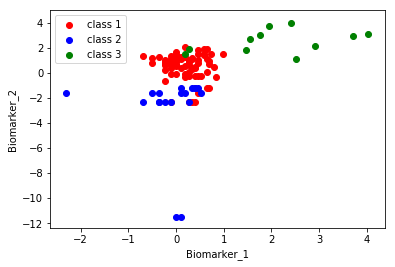

In [5]:
for i in range(0,3,1):
    color=['red','blue','green']
    plt.scatter(data_train.Biomarker1[data_train['Diagnosis']==(i+1)],data_train.Biomarker2[data_train['Diagnosis']==(i+1)],c=color[i],label='class '+str(i+1))

plt.xlabel('Biomarker_1')    
plt.ylabel('Biomarker_2') 
plt.legend()

Regarding train data only : it seems that linear classifier could make a good separation thougha quadratic could be better.
examining the test data it indeed obvious that a quadratic classifier coud do a better work.

2.Briefly explain the difference between multinomial logistic regression and one-vs-rest (OvR)
Logistic regression methods for fitting a multiclass classifier (in 2-3 sentences).

1.OVR:1/(1+exp(−βTix))
2.Multinomial logistic:exp(−βTix)/(∑Kj=1exp(−βTjx)) 
1-we examine each class in separate, and regards the reset of the classes as ~(current class).
2-multinomial conditional distribution is assumed, so learning  βi for one class affects the rest of the classes.

3.Fit linear classification models on the thyroid data set using both the methods. You should use  L2L2 
regularization in both cases, tuning the regularization parameter using cross-validation.
Is there a difference in the overall classification accuracy of the two methods on the training and test sets? 

In [6]:
x_train=data_train[['Biomarker1','Biomarker2']].values
y_train=data_train[['Diagnosis']].values
x_test=data_test[['Biomarker1','Biomarker2']].values
y_test=data_test[['Diagnosis']].values

In [7]:
#OVR
log_reg_ovr=LogisticRegressionCV(penalty='l2', multi_class='ovr')
log_reg_ovr.fit(x_train,y_train)


d:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [14]:
log_reg_ovr.predict_proba(x_train)[:10]

array([[  9.61118968e-01,   1.29464054e-02,   2.59346262e-02],
       [  9.47008809e-01,   7.77066905e-03,   4.52205219e-02],
       [  5.27878848e-01,   4.72003000e-01,   1.18152621e-04],
       [  9.65959758e-01,   2.60404907e-02,   7.99975133e-03],
       [  8.67325808e-01,   2.76332069e-03,   1.29910871e-01],
       [  8.86827935e-01,   3.07710212e-03,   1.10094962e-01],
       [  3.75349817e-01,   6.24620103e-01,   3.00794871e-05],
       [  4.13228405e-01,   5.86764274e-01,   7.32174032e-06],
       [  6.40415042e-01,   3.59341568e-01,   2.43390321e-04],
       [  9.60296512e-01,   3.37186784e-02,   5.98480946e-03]])

In [15]:
data_train.head(10)

,Biomarker1,Biomarker2,Diagnosis
0,0.262372,0.875473,1.0
5,0.336479,1.098616,1.0
9,0.182330,-1.609488,2.0
12,-0.223131,0.788462,1.0
13,0.587792,1.458617,1.0
14,0.470010,1.481607,1.0
15,0.262372,-2.302485,2.0
16,-0.356661,-2.302685,2.0
18,0.095319,-1.204006,2.0
21,-0.223131,0.641859,1.0


In [18]:
log_reg_ovr.predict(x_train)[:10]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.])

In [8]:
#multinomial
log_reg_mult=LogisticRegressionCV(penalty='l2', multi_class='multinomial', solver = 'newton-cg')
log_reg_mult.fit(x_train,y_train)

d:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='newton-cg',
           tol=0.0001, verbose=0)

In [416]:
print("The accuracy of the ovr predictor on the test set is:",log_reg_ovr.score(x_test,y_test))
print("The accuracy of the multinomial predictor on the test set is:",log_reg_mult.score(x_test,y_test))

The accuracy of the ovr predictor on the test set is: 0.840707964602
The accuracy of the multinomial predictor on the test set is: 0.884955752212


In [417]:
print("The accuracy of the ovr predictor on the train set is:",log_reg_ovr.score(x_train,y_train))
print("The accuracy of the multinomial predictor on the train set is:",log_reg_mult.score(x_train,y_train))

The accuracy of the ovr predictor on the train set is: 0.843137254902
The accuracy of the multinomial predictor on the train set is: 0.892156862745


4.
Also, compare the training and test accuracies of these 
models with the following classification methods:
Multiclass Logistic Regression with quadratic terms
Linear Discriminant Analysis
Quadratic Discriminant Analysis
k-Nearest Neighbors 
Note: you may use either the OvR or multinomial variant for the multiclass logistic regression (with  L2L2  regularization).
Do not forget to use cross-validation to choose the regularization parameter, and also the number of neighbors in k-NN.

In [418]:
gen_poly_terms = PolynomialFeatures(2)

In [419]:
x_train_pol = gen_poly_terms.fit_transform(x_train)
x_test_pol = gen_poly_terms.fit_transform(x_test)

In [420]:
x_train_p=x_train_pol #[:,1:]
x_test_p=x_test_pol #[:,1:]

In [421]:
#Multiclass Logistic Regression with quadratic terms
log_reg_mult_quad=LogisticRegressionCV(penalty='l2', multi_class='multinomial', solver = 'newton-cg')
log_reg_mult_quad.fit(x_train_p,y_train)

d:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='newton-cg',
           tol=0.0001, verbose=0)

In [422]:
print("The accuracy of the multinomial  predictor on the train set is:",log_reg_mult_quad.score(x_train_p,y_train))
print("The accuracy of the multinomial  predictor on the test set is:",log_reg_mult_quad.score(x_test_p,y_test))

The accuracy of the multinomial  predictor on the train set is: 0.892156862745
The accuracy of the multinomial  predictor on the test set is: 0.893805309735


In [423]:
lda=LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

In [424]:
lda.fit(x_train,y_train)
qda.fit(x_train,y_train)

d:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [425]:
print("The accuracy of the  lda predictor on the train set is:",lda.score(x_train,y_train))
print("The accuracy of the  lda predictor on the test set is:",lda.score(x_test,y_test))
print("The accuracy of the  qda predictoron the train set is:",qda.score(x_train,y_train))
print("The accuracy of the  qda predictor on the test set is:",qda.score(x_test,y_test))

The accuracy of the  lda predictor on the train set is: 0.872549019608
The accuracy of the  lda predictor on the test set is: 0.83185840708
The accuracy of the  qda predictoron the train set is: 0.872549019608
The accuracy of the  qda predictor on the test set is: 0.849557522124


In [426]:
scores=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    scores.append((cross_val_score(knn,x_train,y_train)).mean())

d:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
d:\Users\Home\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Users\Home\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Users\Home\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was

In [584]:
sc_array=np.array(scores)
max_val=sc_array.argmax()
knn=KNeighborsClassifier(n_neighbors = max_val)
knn.fit(x_train,y_train)
print("The accuracy of the  knn=%d predictor on the test set is:" % max_val,knn.score(x_test,y_test))
print("The accuracy of the  knn=%d predictor on the train set is:" % max_val,knn.score(x_train,y_train))

The accuracy of the  knn=2 predictor on the test set is: 0.849557522124
The accuracy of the  knn=2 predictor on the train set is: 0.901960784314


d:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


5.Does the inclusion of the polynomial terms in logistic regression yield better test accuracy compared to the model with only linear terms?

In [337]:
#yes, there was slight improvement

## Question 2: Visualize Decision Boundaries

The following code will allow you to visualize the decision boundaries of a given classification model.

In [404]:
#  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
#      poly_degree (highest degree of polynomial terms included in the model; None by default)

def plot_decision_boundary(x, y, model, title, ax, poly_degree=None):
    # Create mesh
    # Interval of points for biomarker 1
    min0 = x[:,0].min()
    max0 = x[:,0].max()
    interval0 = np.arange(min0, max0, (max0-min0)/100)
    n0 = np.size(interval0)
    
    # Interval of points for biomarker 2
    min1 = x[:,1].min()
    max1 = x[:,1].max()
    interval1 = np.arange(min1, max1, (max1-min1)/100)
    n1 = np.size(interval1)

    # Create mesh grid of points
    x1, x2 = np.meshgrid(interval0, interval1)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh of points
    # Check if polynomial terms need to be included
    if(poly_degree!=None):
        # Use PolynomialFeatures to generate polynomial terms
        poly = PolynomialFeatures(poly_degree)
        xx_ = poly.fit_transform(xx)
        yy = model.predict(xx_) 
    else:   
        yy = model.predict(xx)
        
    yy = yy.reshape((n0, n1))

    # Plot decision surface
    x1 = x1.reshape(n0, n1)
    x2 = x2.reshape(n0, n1)
    ax.contourf(x1, x2, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot scatter plot of data
    yy = y.reshape(-1,)
    ax.scatter(x[yy==1,0], x[yy==1,1], c='blue', label='Normal', cmap=plt.cm.coolwarm)
    ax.scatter(x[yy==2,0], x[yy==2,1], c='cyan', label='Hyper', cmap=plt.cm.coolwarm)
    ax.scatter(x[yy==3,0], x[yy==3,1], c='red', label='Hypo', cmap=plt.cm.coolwarm)
    
    # Label axis, title
    ax.set_title(title)
    ax.set_xlabel('Biomarker 1')
    ax.set_ylabel('Biomarker 2')

**Note:** The provided code uses `sklearn`'s `PolynomialFeatures` to generate higher-order polynomial terms, with degree `poly_degree`. 
Also, if you have loaded the data sets into `pandas` data frames, you may use the `as_matrix` function to obtain a `numpy` array from the data frame objects.

1. Use the above code to visualize the decision boundaries for each of the model fitted in the previous part.
2. Comment on the difference in the decision boundaries (if any) for the OvR and multinomial logistic regression models. Is there a difference between the decision boundaries for the linear logistic regression models and LDA. What about the decision boundaries for the quadratic logistic regression and QDA? Give an explanation for your answer.

In [379]:
#TRAIN DATA

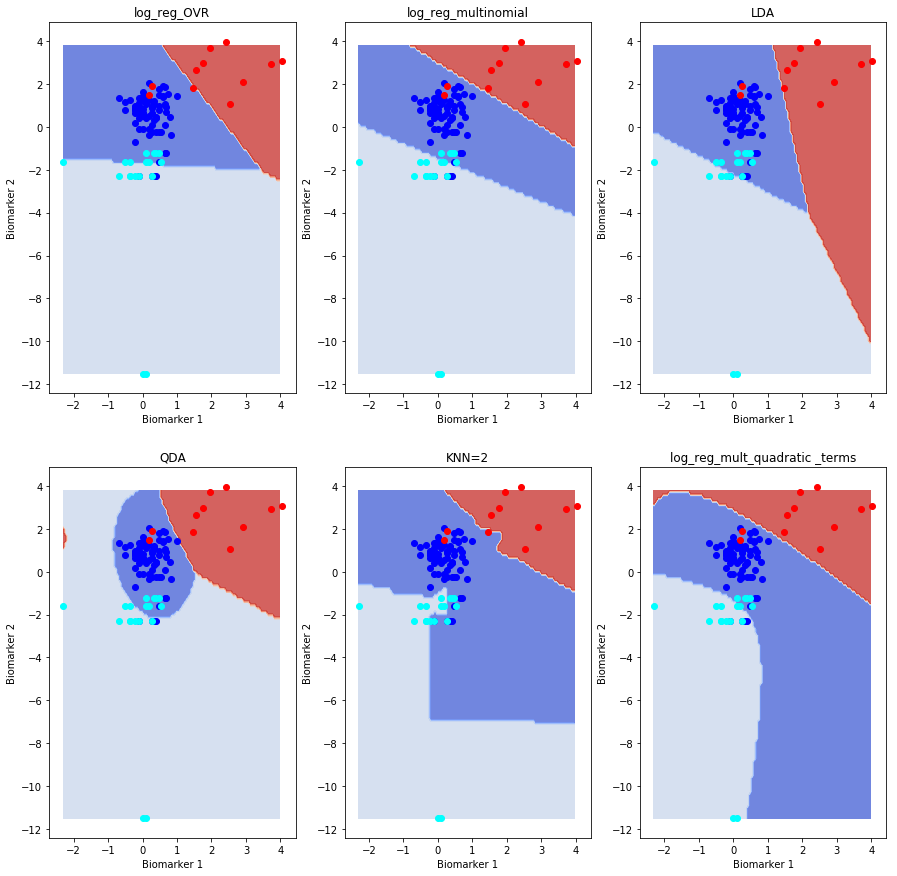

In [439]:
f,ax=plt.subplots(2, 3, figsize = (15,15))
models=[log_reg_ovr,
        log_reg_mult,        
        lda,qda,knn,
        log_reg_mult_quad   ]

names=['log_reg_OVR',
       'log_reg_multinomial',      
       'LDA','QDA','KNN=2',
       'log_reg_mult_quadratic _terms'  ]
count=0
for i in range(len(ax)):
     for j in range(len(ax[0])):
        if (count==5):
            degree=2         
        else:
            degree=None                       
        plot_decision_boundary(x_train, y_train, models[count], names[count], ax[i,j], poly_degree=degree)
        count=count+1
        if ((i+j)==5):
            break  

In [ ]:
#TEST DATA

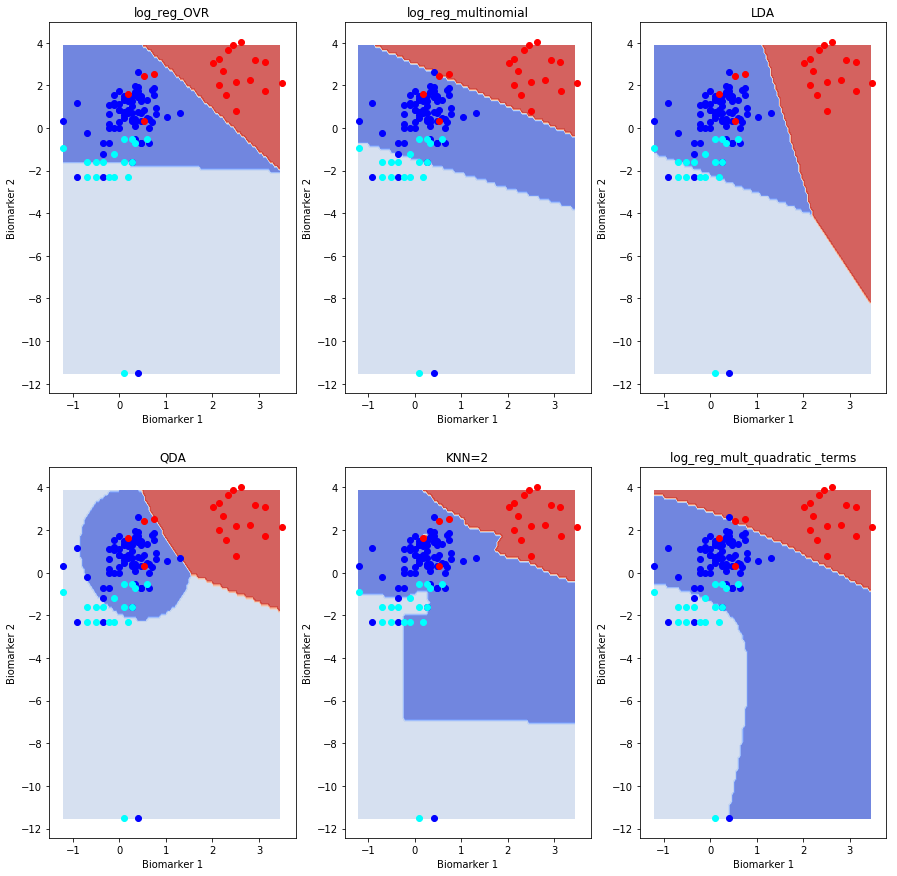

In [442]:
f,ax=plt.subplots(2, 3, figsize = (15,15))
models=[log_reg_ovr,
        log_reg_mult,        
        lda,qda,knn,
        log_reg_mult_quad   ]

names=['log_reg_OVR',
       'log_reg_multinomial',      
       'LDA','QDA','KNN=2',
       'log_reg_mult_quadratic _terms'  ]
count=0
for i in range(len(ax)):
     for j in range(len(ax[0])):
        if (count==5):
            degree=2         
        else:
            degree=None                       
        plot_decision_boundary(x_test, y_test, models[count], names[count], ax[i,j], poly_degree=degree)
        count=count+1
        if ((i+j)==5):
            break 

## Question 3: Fit Decision Trees

We next try out decision trees for thyroid classification. For the following questions, you may use the *Gini* index as the splitting criterion while fitting the decision tree. 
1. Fit a decision tree model to the thyroid data set with (maximum) tree depths 2, 3, ..., 10. Make plots of the training and test accuracies as a function of the tree depth. Is there a depth at which the fitted decision tree model achieves near-perfect classification on the training set? If so, what can you say about the test accuracy of this model?

2. Use 5-fold cross-validation to find the optimal tree depth. How does the performance of a decision tree fitted with this depth compare with the models fitted in Part 2(a)?

3. Use the code provided in Part 2(c) to visualize the decision boundary of the fitted decision tree. How is the decision boundary of the decision tree model different from the other methods? Given an explanation for your observation.

4. Use the `export_graphviz` function in `sklearn` to generate a visualization of the tree diagram for the fitted model. Based on the visualization, explain *in words* how the fitted model diagnoses 'hypothyroidism' for a patient.  


1.Fit a decision tree model to the thyroid data set with (maximum) tree depths 2, 3, ..., 10.
Make plots of the training and test accuracies as a function of the tree depth. 
Is there a depth at which the fitted decision tree model achieves near-perfect classification on the training set? 
If so, what can you say about the test accuracy of this model?

In [536]:
depth = [i for i in range(2, 11)]

In [537]:
score_train=[]
score_test=[]
for i in depth:
    dt=DecisionTreeClassifier( max_depth=i)
    dt.fit(x_train, y_train)
    score_train.append(dt.score(x_train, y_train))
    score_test.append(dt.score(x_test, y_test))    

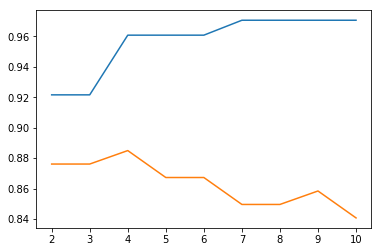

In [538]:
plt.plot(depths,score_train,label='train')
plt.plot(depths,score_test,label='test')

2.Use 5-fold cross-validation to find the optimal tree depth. How does the performance of a decision tree fitted with this depth
compare with the models fitted in Part 2(a)?

In [554]:
score_train_cvs=[]
score_test_cvs=[]
for i in depth:
    dt=DecisionTreeClassifier( max_depth=i)
    score_train_cvs.append(np.mean(cross_val_score(dt,x_train, y_train,cv=5)))
    score_test_cvs.append(np.mean(cross_val_score(dt,x_test, y_test,cv=5)))

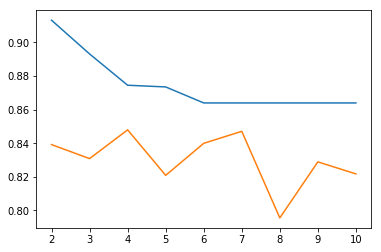

In [555]:
plt.plot(depths,score_train_cvs,label='train')
plt.plot(depths,score_test_cvs,label='test')

In [557]:
print("The maximum score of 5-fold cross validation on the train set: ", np.max(score_train_cvs))
print("The maximum score of 5-fold cross validation on the test set: ",np.max(score_test_cvs))

The maximum score of 5-fold cross validation on the train set:  0.91314650262
The maximum score of 5-fold cross validation on the test set:  0.847943722944


3.Use the code provided in Part 2(c) to visualize the decision boundary of the fitted decision tree. 
How is the decision boundary of the decision tree model different from the other methods? 
Given an explanation for your observation.

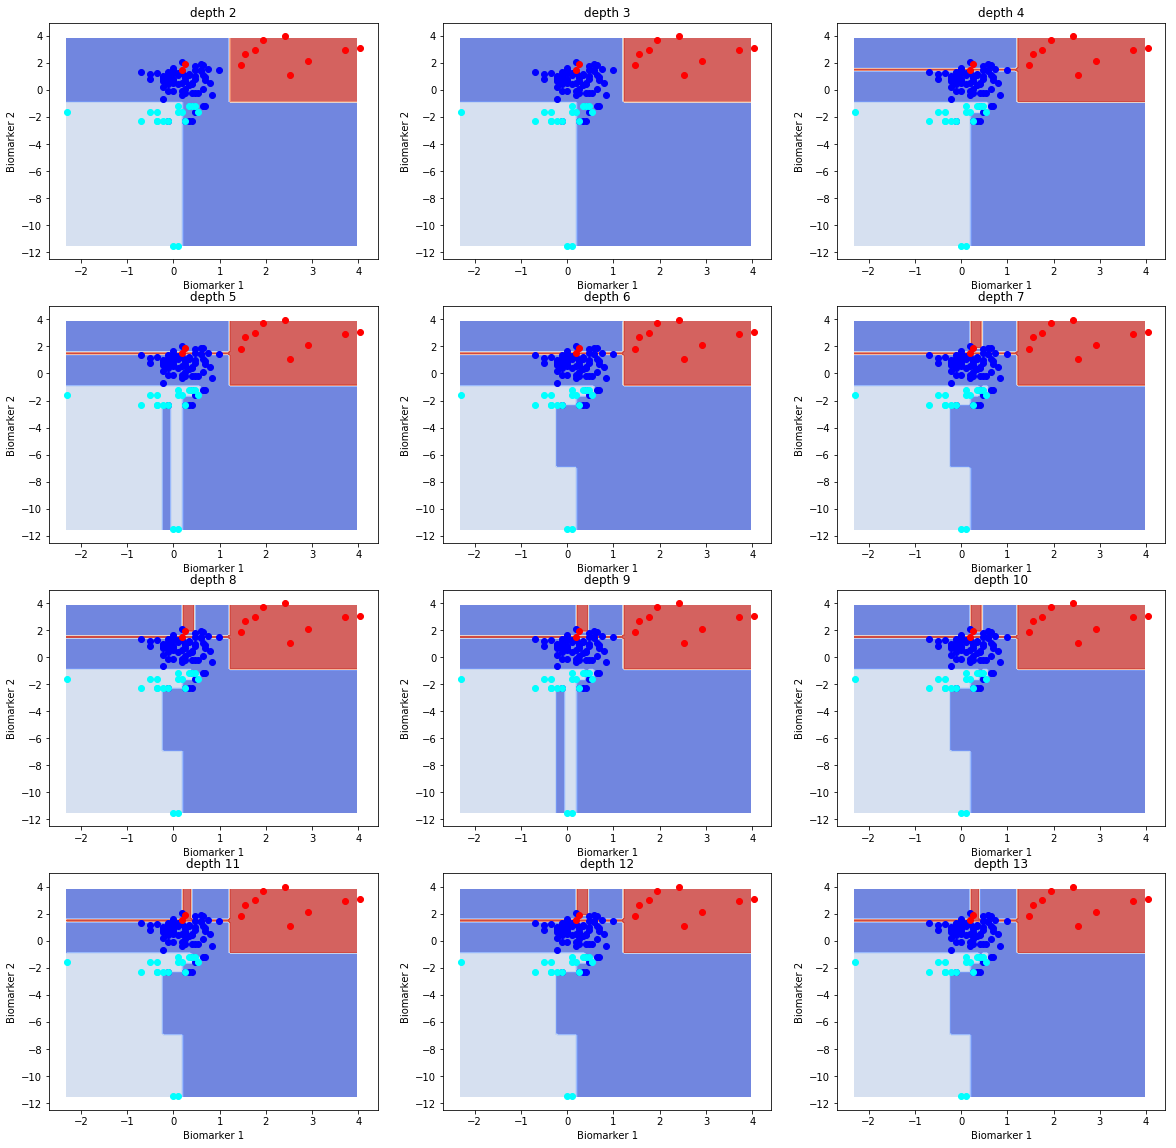

In [572]:
f,ax=plt.subplots(4, 3, figsize = (20,20))
count=2
for i in range(len(ax)):
     for j in range(len(ax[0])):
        dt=DecisionTreeClassifier( max_depth=count) 
        dt.fit(x_train, y_train)
        name='depth '+str(count)
        plot_decision_boundary(x_train, y_train, dt, name, ax[i,j], poly_degree=None)
        count=count+1
       

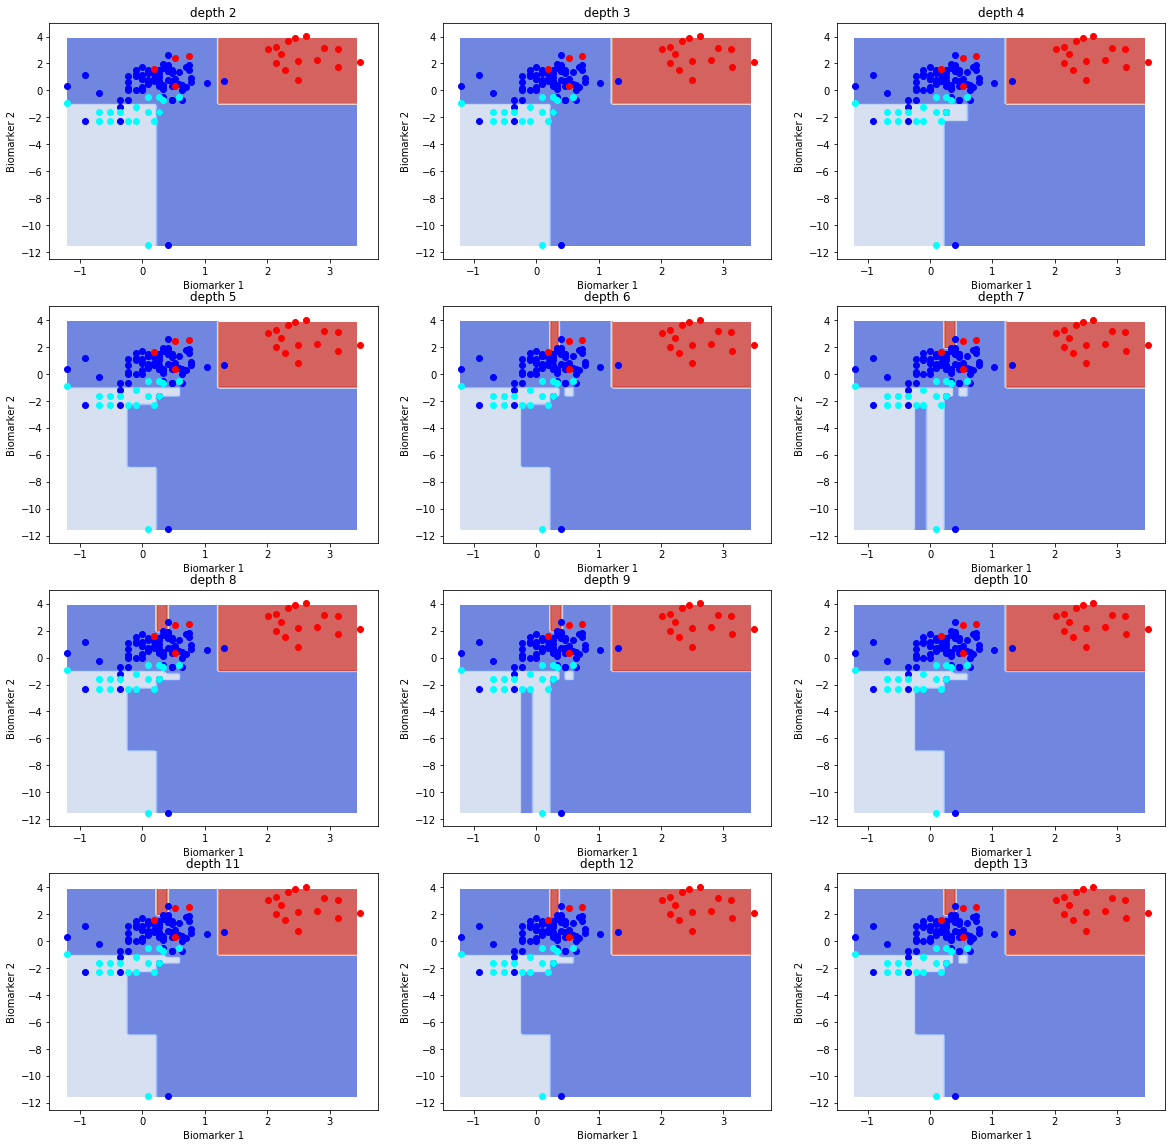

In [569]:
f,ax=plt.subplots(4, 3, figsize = (20,20))
count=2
for i in range(len(ax)):
     for j in range(len(ax[0])):
        dt=DecisionTreeClassifier( max_depth=count) 
        dt.fit(x_train, y_train)
        name='depth '+str(count)
        plot_decision_boundary(x_test, y_test, dt, name, ax[i,j], poly_degree=None)
        count=count+1
    

In [573]:
#The decision tree eventually will suplly boundaries based on contuoring each point in the set, in other methods like LDA and QDA
#The shape of the boundary between the classes is defined by the method itself and as such already limiting the possibility 
#for overfit.

4.Use the export_graphviz function in sklearn to generate a visualization of the tree diagram for the fitted model. 
Based on the visualization, explain in words how the fitted model diagnoses 'hypothyroidism' for a patient.

In [575]:
dt=DecisionTreeClassifier( max_depth=4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [577]:
export_graphviz(dt, out_file='my_tree.dot')

In [ ]:
#how the model diagnoses class=3
# at each node , value is chosen to categorize the attribute - basicaly provides a boundary between the classes based on a gini index
# for the chosen boundary.
#from our tree we see that at the first node:
#Decission boundary 1. bio2 <=-0.949 the following two nodes are derived in accordance true/false
#Second 2 nodes:
#decission boundary 1: bio1 <= 0.222 ->true/false
#decission boundary 1: bio1 <= 1.226 ->true/false
#the region with bio1 >1.226 and bio2 >-0.949 is for class 3

*Note:* Look at the `export_graphviz` function in the `sklearn.tree` module. 

You can get a graphic for this visualization by pasting the generated graphviz file in the text box at http://www.webgraphviz.com/ , or you can do it on your own computer.

If you choose the do the latter, you will have to install `GraphViz` and `pydot` to use the decision tree rendering code. For this, you may execute the following commands in a terminal:

`$pip install graphviz`<br>
`$pip install pydot`

*Hint:* You may use the `DecisionTreeClassifier` class to fit a decision tree classifier and the `max_depth` attribute to set the tree depth. You may use the `cross_val_score` function for cross-validation with decision trees.

## Question 4: Too many models to choose from!

We have so far seen six different ways of fitting a classification model for thyroid classification problem: **linear logistic regression**, **logistic regression with polynomial terms**, **LDA**, **QDA**, **k-NN** and **decision tree**. Which of these methods should one use in practice? To answer this question, we now look at the pros and cons of each method.

1. Compare and contrast the six models based on each of the following criteria (a supporting table to summarize your  thoughts can be helpful):
  - Classification performance
  - Complexity of decision boundary
  - Memory storage
  - Ease of interpretability

2. If you were a clinician who had to use the classifier to diagnose thyroid disorders in patients, which among the six methods would you be most comfortable in using? 

Classification performance: 
Linear logistic regression,logistic regression polynomial terms,LDA ,QDA ,k-NN ,decision tree,All the models performed equally 
logistic regression polynomial terms had the best performane from all on the test set though the difference was not too large berween 
all the models.
Complexity of decision boundary:
knn and decission tree have the most complex boundary among all the methods, 
Memory storage:
Linear logistic regression: number of predictors+1 is the number of fitted parameters
logistic regression polynomial terms:number of predictors+1
LDA: mean, variance for each of the classes
QDA: mean, variance for each of the classes
k-NN: examines each point seperately
Decission tree: at each step 2^current_depth calculations are performed.
Ease of interpretability:
QDA and logistic regression with polynomial terms would be the most difficult to interpret just from looking the at boundaries graph.

2.If you were a clinician who had to use the classifier to diagnose thyroid disorders in patients, 
which among the six methods would you be most comfortable in using?
Based on this example, the performance of all the models is practically the same, however QDA and logistic regression with polynomial terms appear to be most 'safe' as comparing to knn and decission tree since they are less likely to overfit, bot still account for more features that logit and LDA.

## Question 5: Including an 'abstain' option

One of the reasons a hospital might be hesitant to use your thyroid classification model is that a misdiagnosis by the model on a patient can sometimes prove to be very costly (e.g. if the patient were to file a law suit seeking a compensation for damages). One way to mitigate this concern is to allow the model to 'abstain' from making a prediction, whenever it is uncertain about the diagnosis for a patient. However, when the model abstains from making a prediction, the hospital will have to forward the patient to a thyroid specialist (i.e. an endocrinologist), which would incur additional cost. How does one design a thyroid classification model with an abstain option, such that the cost to the hospital is minimized?

1. More specifically, suppose the cost incurred by a hospital when a model mis-predicts on a patient is \$5000, and the cost incurred when the model abstains from making a prediction is \$1000. What is the average cost per patient for the OvR logistic regression model from Question 1, Part 3? Note that this needs to be evaluated on the patients in the test set. Your task is to design a classification strategy (into the 3 groups plus the *abstain* group) that has as low cost as possible per patient.   Give a justification for your approach.

2. **Presentation:** Prepare a set of 5 slides explaining your approach to the hospital management. Your presentation must be accessible to the lay man. Explain in particular how your approach would be robust to changes in the costs of using the abstain option.

*Hint:* think of a way to use the estimated probabilities from the logistic regression model to decide who to classify as *abstain*.

In [45]:
data_train_exam=x_train
pred_x_train=log_reg_ovr.predict(x_train)
pred_x_train=pred_x_train.reshape(102,1)
data_train_exam.shape
pred_x_train_prob=log_reg_ovr.predict_proba(x_train).reshape(102,3)

In [49]:
a=np.concatenate((data_train_exam,y_train),axis=1)
b=np.concatenate((a,pred_x_train),axis=1)
c=np.concatenate((b,pred_x_train_prob),axis=1)

In [126]:
df_train_exam=pd.DataFrame(data=c,columns=['Biomarker1', 'Biomarker2', 'class', 'pred_class', 'prob_cl_1.0','prob_cl_2.0','prob_cl_3.0'])

In [127]:
data_test_exam=x_test
pred_x_test=log_reg_ovr.predict(x_test)
pred_x_test=pred_x_test.reshape(113,1)
data_test_exam.shape
pred_x_test_prob=log_reg_ovr.predict_proba(x_test).reshape(113,3)

In [128]:
d=np.concatenate((data_test_exam,y_test),axis=1)
e=np.concatenate((d,pred_x_test),axis=1)
f=np.concatenate((e,pred_x_test_prob),axis=1)

In [161]:
df_test_exam=pd.DataFrame(data=f,columns=['Biomarker1', 'Biomarker2', 'class', 'pred_class', 'prob_cl_1.0','prob_cl_2.0','prob_cl_3.0'])

In [232]:
df_miss_train=df_train_exam[df_train_exam['class']!=df_train_exam['pred_class']]
df_miss_test=df_test_exam[df_test_exam['class']!=df_test_exam['pred_class']]
len(df_miss_train)

16

In [144]:
df_train_exam[np.abs(df_train_exam['prob_cl_1.0']-df_train_exam['prob_cl_2.0'])<=0.1]

,Biomarker1,Biomarker2,class,pred_class,prob_cl_1.0,prob_cl_2.0,prob_cl_3.0
2,0.182330,-1.609488,2.0,1.0,0.527879,0.472003,1.181526e-04
27,-2.302485,-1.609388,2.0,2.0,0.495998,0.504002,5.172496e-07
59,0.530634,-1.609388,2.0,1.0,0.545500,0.454213,2.869449e-04
65,0.470010,-1.609488,1.0,1.0,0.542132,0.457622,2.451489e-04
88,-0.356661,-1.609488,2.0,1.0,0.508921,0.491047,3.233012e-05
95,0.095319,-1.609488,2.0,1.0,0.524121,0.475784,9.525004e-05
98,-0.510809,-1.609388,2.0,1.0,0.505336,0.494641,2.268607e-05


In [135]:
df_train_exam[np.abs(df_train_exam['prob_cl_1.0']-df_train_exam['prob_cl_3.0'])<=0.1]

,Biomarker1,Biomarker2,class,pred_class,prob_cl_1.0,prob_cl_2.0,prob_cl_3.0
30,0.000010,-11.512925,2.0,2.0,0.009187,0.990813,1.824171e-13
36,1.458617,1.840551,3.0,1.0,0.520918,0.000330,4.787521e-01
87,0.095319,-11.512925,2.0,2.0,0.008332,0.991668,2.199839e-13


In [241]:
df_train_exam[np.abs(df_train_exam['prob_cl_2.0']-df_train_exam['prob_cl_3.0'])<=0.1].head()

,Biomarker1,Biomarker2,class,pred_class,prob_cl_1.0,prob_cl_2.0,prob_cl_3.0
0,0.262372,0.875473,1.0,1.0,0.961119,0.012946,0.025935
1,0.336479,1.098616,1.0,1.0,0.947009,0.007771,0.045221
3,-0.223131,0.788462,1.0,1.0,0.965960,0.026040,0.008000
9,-0.223131,0.641859,1.0,1.0,0.960297,0.033719,0.005985
10,-0.223131,0.993255,1.0,1.0,0.970001,0.018050,0.011949


In [172]:
indexes=[]
prob_dif=[]
def mis_val(df):
    for i in range(df.shape[0]):
        if (df['pred_class'][i]!=df['class'][i]):
            name_c='prob_cl_'+str(df['class'][i])
            name_pr_c='prob_cl_'+str(df['pred_class'][i])
            indexes.append(i)
            prob_dif.append(df[name_c][i]-df[name_pr_c][i])
    return  prob_dif      

In [169]:
df_miss_train['prob_dif']=mis_val(df_train_exam)

d:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
df_miss_test['prob_dif']=mis_val(df_test_exam)

d:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
df_miss_train.head()

,Biomarker1,Biomarker2,class,pred_class,prob_cl_1.0,prob_cl_2.0,prob_cl_3.0
2,0.182330,-1.609488,2.0,1.0,0.527879,0.472003,0.000118
8,0.095319,-1.204006,2.0,1.0,0.640415,0.359342,0.000243
11,0.262372,-2.302485,1.0,2.0,0.375350,0.624620,0.000030
14,0.336479,-1.203939,2.0,1.0,0.665384,0.334169,0.000447
21,0.262372,1.902109,3.0,1.0,0.851906,0.001714,0.146380


In [238]:
len(df_miss_test)

18

In [165]:
np.count_nonzero(np.abs(df_miss_train['prob_dif'])<0.1)

6

In [175]:
np.count_nonzero(np.abs(df_miss_test['prob_dif'])<0.1)

5

In [189]:
x_train_abs=np.abs(df_miss_train['prob_dif'].values)
x_test_abs=np.abs(df_miss_test['prob_dif'].values)

In [215]:
x_ser=[x_train_abs,x_test_abs]
names=['train','test']

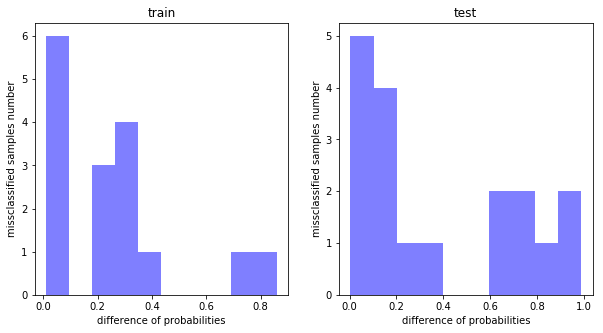

In [216]:
f,ax=plt.subplots(1, 2, figsize = (10,5))
for i in range(len(x_ser)):
    ax[i].hist(x_ser[i], 10, facecolor='blue', alpha=0.5)
    ax[i].set_title(names[i])
    ax[i].set_xlabel('difference of probabilities')
    ax[i].set_ylabel('missclassified samples number')
plt.show()   

In most of the cases when the patient was missclassified, the predicted probability was near ~ 0.5+-0.05 when the difference between the predicted class and the correct class was < 0.1.Thus we will put in the 'abstain' class all the cases with the predicted probability of 0.5+-0.05.

In [230]:
df_abstain_train=df_train_exam[(np.abs(df_train_exam['prob_cl_1.0']-0.5)<=0.05)|(np.abs(df_train_exam['prob_cl_2.0']-0.5)<=0.05)|(np.abs(df_train_exam['prob_cl_3.0']-0.5)<=0.05)]

In [233]:
pd.merge(df_abstain_train, df_miss_train, how='inner')

,Biomarker1,Biomarker2,class,pred_class,prob_cl_1.0,prob_cl_2.0,prob_cl_3.0
0,0.182330,-1.609488,2.0,1.0,0.527879,0.472003,0.000118
1,1.458617,1.840551,3.0,1.0,0.520918,0.000330,0.478752
2,0.530634,-1.609388,2.0,1.0,0.545500,0.454213,0.000287
3,-0.356661,-1.609488,2.0,1.0,0.508921,0.491047,0.000032
4,0.095319,-1.609488,2.0,1.0,0.524121,0.475784,0.000095
5,-0.510809,-1.609388,2.0,1.0,0.505336,0.494641,0.000023


in the df_abstain_train data only 2 patients were correctly classified from 8 that we put in the abstain class, but there are 16 
in the train set (102 samples) that were misclassified.From the misclassified we managed to relocate 6 samples to the abstain class
Thus on the train set:   
5000*10 - > misclassified cost. 
1000*8 - > abstaine cost.
13000/102=568$ average cost per patient.

In [240]:
df_abstain_test=df_test_exam[(np.abs(df_test_exam['prob_cl_1.0']-0.5)<=0.05)|(np.abs(df_test_exam['prob_cl_2.0']-0.5)<=0.05)|(np.abs(df_test_exam['prob_cl_3.0']-0.5)<=0.05)]
len(df_abstain_test)

6

In [239]:
pd.merge(df_abstain_test, df_miss_test, how='inner')

,Biomarker1,Biomarker2,class,pred_class,prob_cl_1.0,prob_cl_2.0,prob_cl_3.0
0,-0.510809,-1.609488,2.0,1.0,0.505320,0.494658,0.000023
1,-0.356661,-1.609488,2.0,1.0,0.508921,0.491047,0.000032
2,-0.693127,-1.609388,2.0,1.0,0.501988,0.497997,0.000015
3,0.095319,-1.609488,2.0,1.0,0.524121,0.475784,0.000095
4,0.262372,-1.609388,2.0,1.0,0.531598,0.468257,0.000144


On the test set

There were 18 patients missclassified , 5 of wich we managed to put in the abstain class, the abstain class has 6 patients
Thus on the test set:   
5000*13 - > misclassified cost. 
1000*6 - > abstaine cost.
13000/113=628$ average cost per patient.